In [3]:
# Loading sleep dataset
sleep

extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6
3.7,1,7
0.8,1,8
0.0,1,9
2.0,1,10


In [4]:
#What is sleep data?
help(sleep)

Data which show the effect of two soporific drugs (increase in hours of sleep compared to control) on 10 patients. 

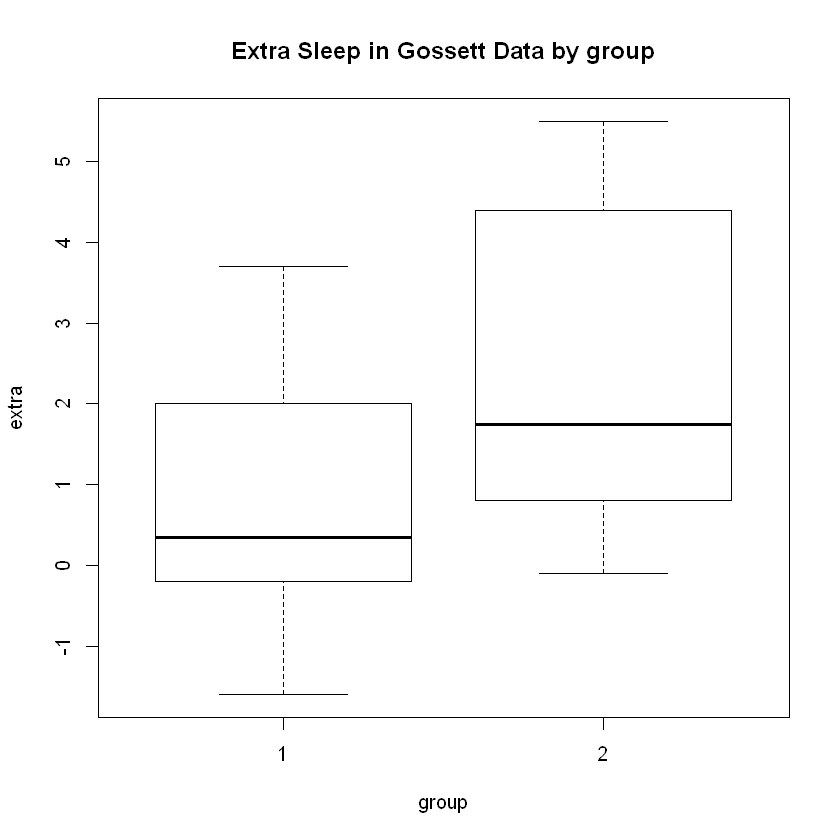

In [5]:
plot(extra~group,data = sleep, main ="Extra Sleep in Gossett Data by group")

### Is there a difference in the average response to each of the two drugs?

In [6]:
attach(sleep)

In [7]:
extra.1 = extra[group == 1]
extra.2 = extra[group == 2]

In [8]:
# paired t-test for diffrence of mean alternate hypothesis is u1 =/= u2 (two sided)
t.test(extra.1,extra.2,paired=TRUE, alternative="two.sided")


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


p-value = 0.002833 at alpha = 0.01 p<alpha so we reject the null hypothesis

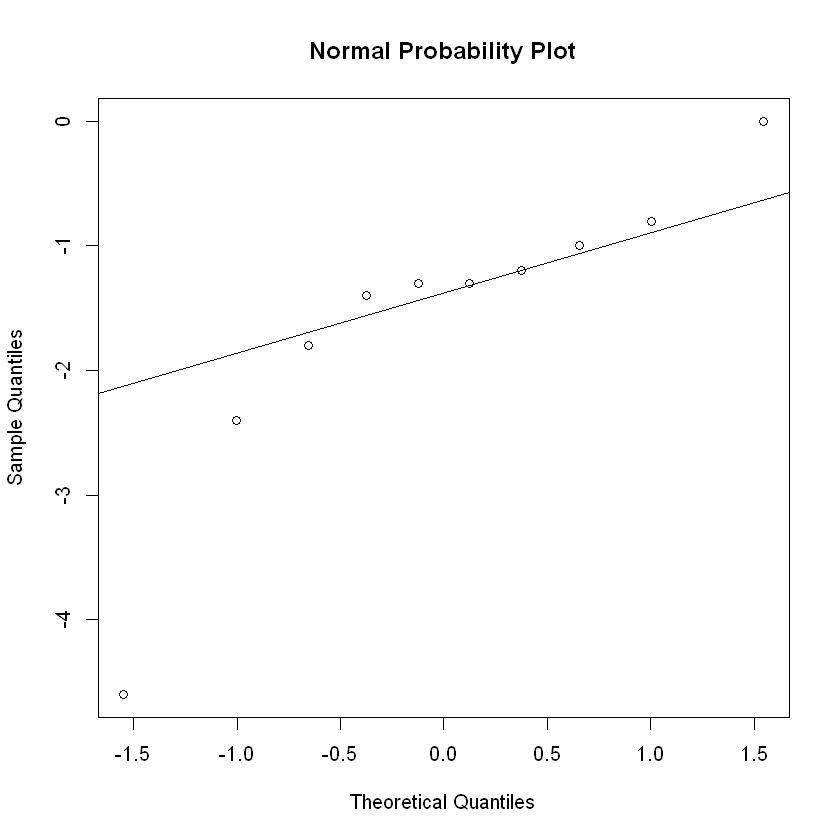

In [9]:
#For the test to be meaningfull the population of diffrences must follow the Normal Distribution
diffs = extra.1 - extra.2
qqnorm(diffs, main = "Normal Probability Plot")
qqline(diffs)

### Regression Model 

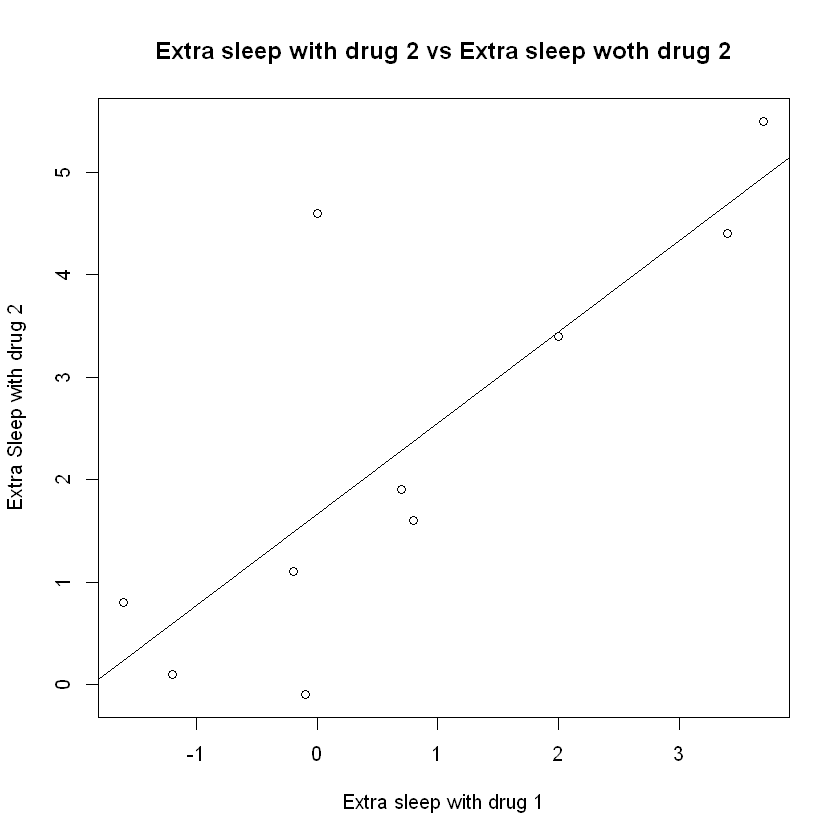

In [10]:
plot(extra.2~extra.1, xlab = "Extra sleep with drug 1", ylab = "Extra Sleep with drug 2",main = "Extra sleep with drug 2 vs Extra sleep woth drug 2")
sleep.linear.model = lm(extra.2~extra.1)
abline(sleep.linear.model)

### Analysing person's response on second drug given there response on first drug

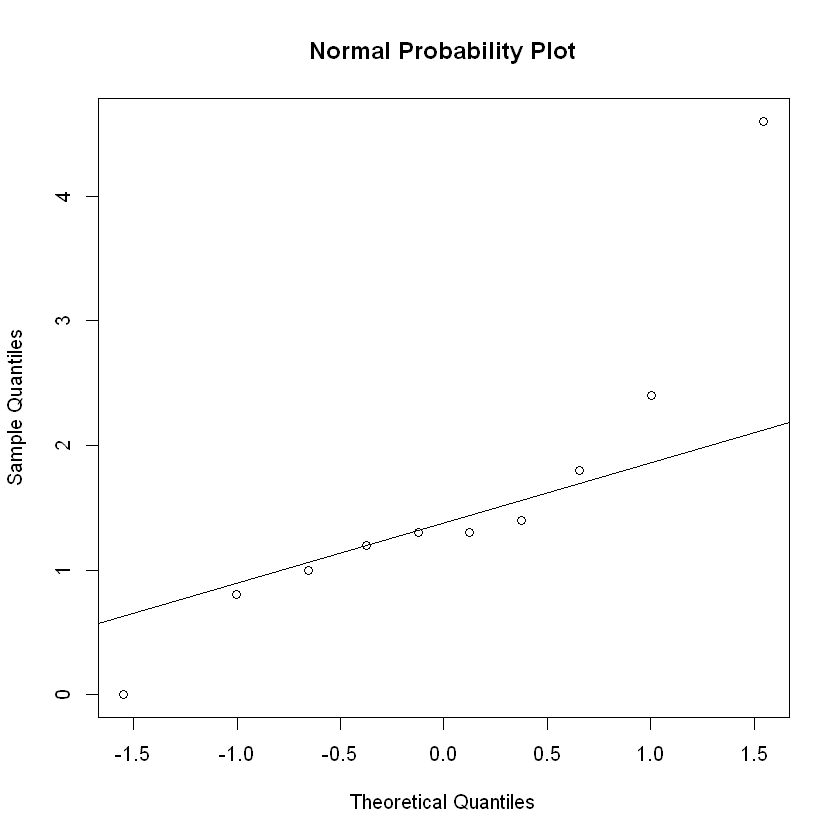

In [13]:
diffs = extra.2 - extra.1
qqnorm(diffs, main = "Normal Probability Plot")
qqline(diffs)

In [14]:
summary(sleep.linear.model)


Call:
lm(formula = extra.2 ~ extra.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6735 -0.4673 -0.3365  0.3979  2.9375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.6625     0.4452   3.734  0.00575 **
extra.1       0.8899     0.2399   3.709  0.00596 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.288 on 8 degrees of freedom
Multiple R-squared:  0.6323,	Adjusted R-squared:  0.5863 
F-statistic: 13.76 on 1 and 8 DF,  p-value: 0.005965


Meaning of the above output - 

On the standard test weather the slope is 0 at level of significance 0.01 the p - value  = 0.00596 < 0.01 so we regect the null hypothesis and say that slope is not zero

What do you predict for sleep gained with drug 2 ifyou know the sleep gained with drug 1 is 2 hours?

In [27]:
intercept <- summary(sleep.linear.model)$coefficients[1,1]
slope <- summary(sleep.linear.model)$coefficients[2,1]

In [28]:
slope*2 + intercept

[1] 3.442437

What is the residual associated with the 3rddata point? 

In [29]:
extra.2[3] - (slope*extra.1[3] + intercept)

[1] -0.3845478

In [31]:
resid(sleep.linear.model)[3]

3 
-0.3845478